In [85]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [86]:
df = pd.read_csv('/kaggle/input/insurance-claim/Insurance.csv')

In [87]:
target = 'insuranceclaim'
labels = ['Claimed','Not Claimed']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print(' Inference: The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


 Inference: The Datset consists of 8 features & 1338 samples.


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [89]:
df.nunique().sort_values()

sex                  2
smoker               2
insuranceclaim       2
region               4
children             6
age                 47
bmi                548
charges           1337
dtype: int64

In [90]:
display(df.describe())

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [91]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [92]:
df = df.drop_duplicates()
print(df.shape)

(1337, 8)


In [93]:
cats =[]
nums =[]
#index_column = Data.index.name

print(df.columns)
for column in df.columns:
    if df[column].nunique()>10:
        nums.append(column)
    else:
        cats.append(column)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')


In [94]:
print(nums)
print(cats)

['age', 'bmi', 'charges']
['sex', 'children', 'smoker', 'region', 'insuranceclaim']


# Catergorical Variable Univariate Analysis

In [95]:
#frequency distribution
for column in cats:
    print(df[column].value_counts())
    print("\n")  

sex
1    675
0    662
Name: count, dtype: int64


children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
0    1063
1     274
Name: count, dtype: int64


region
2    364
3    325
1    324
0    324
Name: count, dtype: int64


insuranceclaim
1    782
0    555
Name: count, dtype: int64




In [96]:
binary_columns = ['sex', 'smoker', 'insuranceclaim']

binary_mappings = {
    'sex': {1: 'Male', 0: 'Female'},
    'smoker': {1: 'Yes', 0: 'No'},
    'insuranceclaim': {1: 'claimed', 0: 'not claimed'}
}

print("Original values in the binary columns:")
for column in binary_columns:
    print(f"{column}: {df[column].unique()}")  

for column in binary_columns:
    df[column] = df[column].map(binary_mappings[column])  # Apply the mapping

# Step 4: Check the values after mapping
print("\nValues in the binary columns after mapping:")
for column in binary_columns:
    print(f"{column}: {df[column].unique()}")  

# Define custom labels for regions
region_labels = {
    0: 'Northeast',
    1: 'Northwest',
    2: 'Southeast',
    3: 'Southwest'
}

# Map the region column to custom labels
df['region'] = df['region'].map(region_labels)

print("\nUpdated DataFrame:")
print(df)

Original values in the binary columns:
sex: [0 1]
smoker: [1 0]
insuranceclaim: [1 0]

Values in the binary columns after mapping:
sex: ['Female' 'Male']
smoker: ['Yes' 'No']
insuranceclaim: ['claimed' 'not claimed']

Updated DataFrame:
      age     sex     bmi  children smoker     region      charges  \
0      19  Female  27.900         0    Yes  Southwest  16884.92400   
1      18    Male  33.770         1     No  Southeast   1725.55230   
2      28    Male  33.000         3     No  Southeast   4449.46200   
3      33    Male  22.705         0     No  Northwest  21984.47061   
4      32    Male  28.880         0     No  Northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    Male  30.970         3     No  Northwest  10600.54830   
1334   18  Female  31.920         0     No  Northeast   2205.98080   
1335   18  Female  36.850         0     No  Southeast   1629.83350   
1336   21  Female  25.800         0     No  Southwest   2007.94

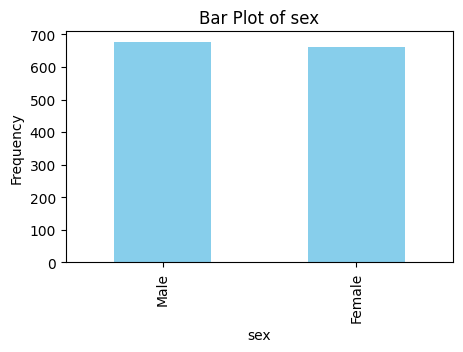

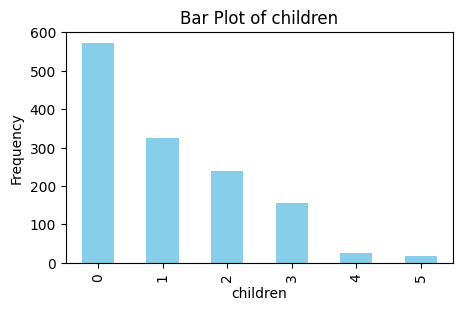

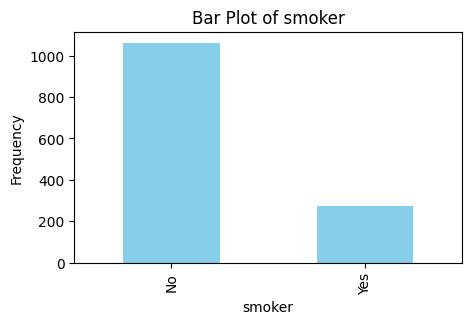

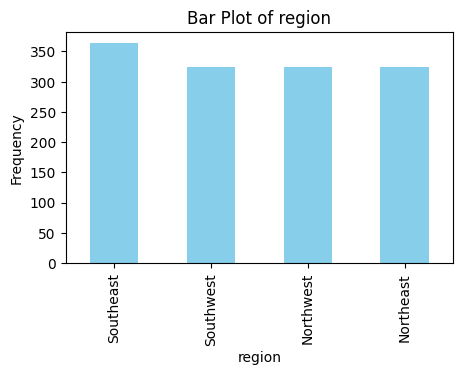

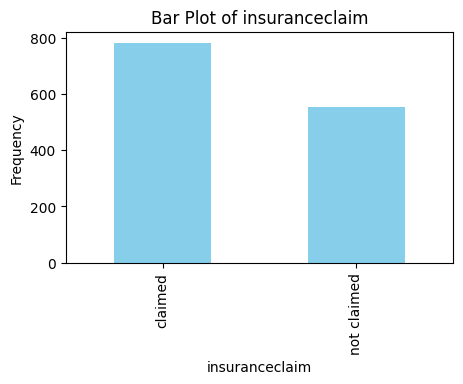

In [97]:
#Bar Plot
import matplotlib.pyplot as plt
for column in cats:
    plt.figure(figsize=(5, 3))  
    df[column].value_counts().plot(kind='bar', color='skyblue')
    
    plt.title(f"Bar Plot of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.show()


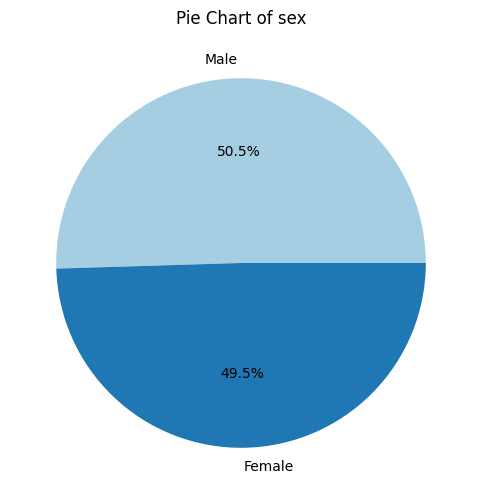

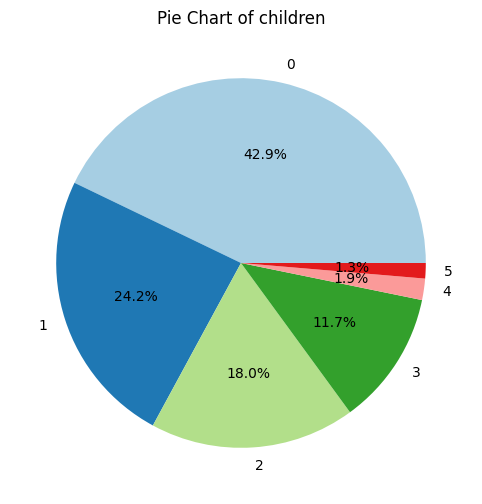

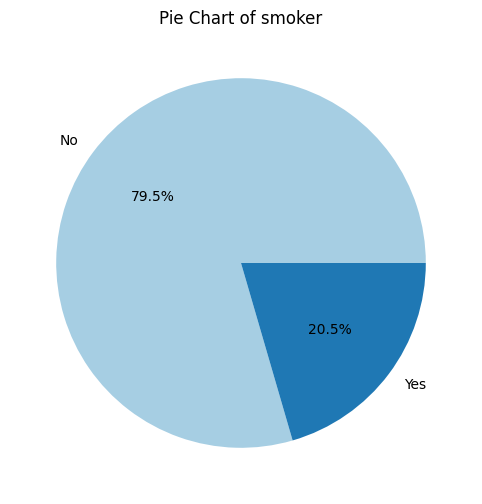

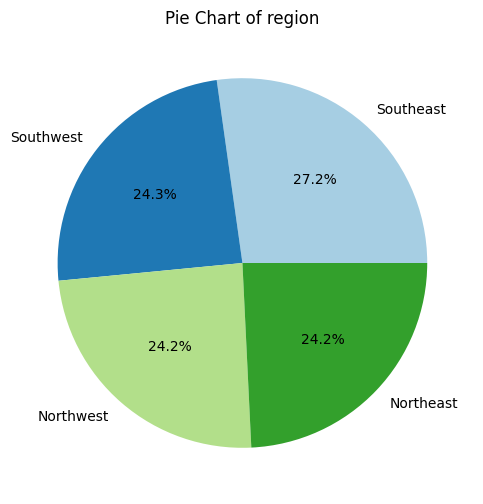

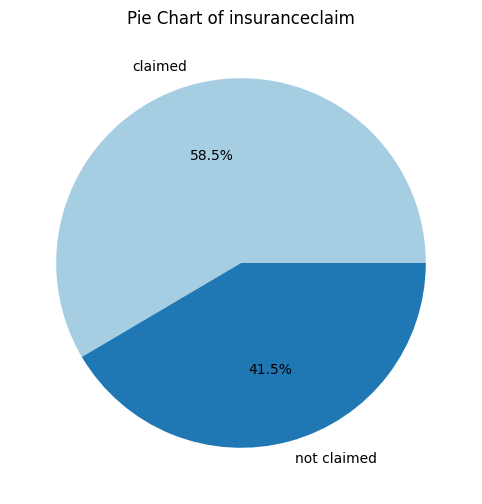

In [98]:
#Pie Chart
for column in cats:
    plt.figure(figsize=(8, 6))  
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    
    plt.title(f"Pie Chart of {column}")
    plt.ylabel('') 
    plt.show()

# Numerical Variable Univariate Analysis

In [99]:
print(nums)

['age', 'bmi', 'charges']


In [100]:
print('Statstics of age variable')
print(df['age'].describe())
print('Statstics of bmi variable')
print(df['bmi'].describe())
print('Statstics of charges variable')
print(df['charges'].describe())

Statstics of age variable
count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
Statstics of bmi variable
count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64
Statstics of charges variable
count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64


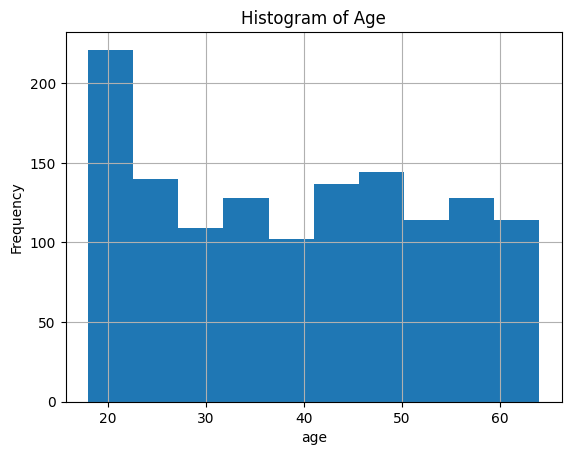

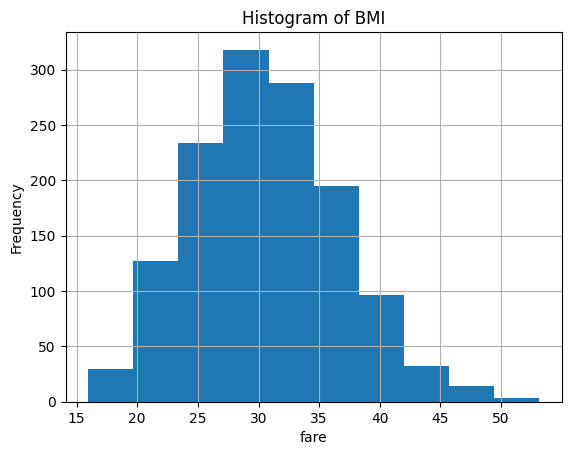

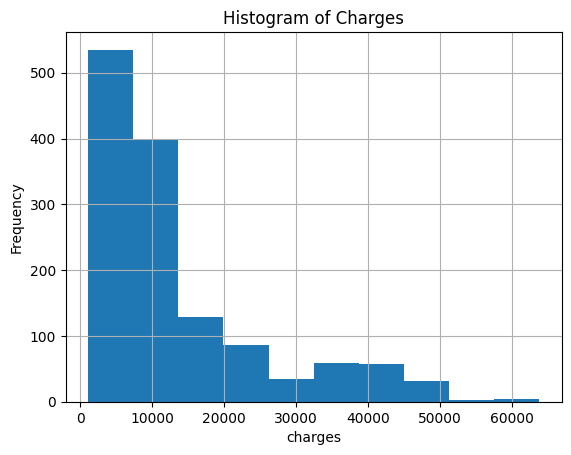

In [101]:
df['age'].hist(bins=10)
plt.title("Histogram of Age")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.show()

df['bmi'].hist(bins=10)
plt.title("Histogram of BMI")
plt.xlabel("fare")
plt.ylabel("Frequency")
plt.show()

df['charges'].hist(bins=10)
plt.title("Histogram of Charges")
plt.xlabel("charges")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_30/529320052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of age')

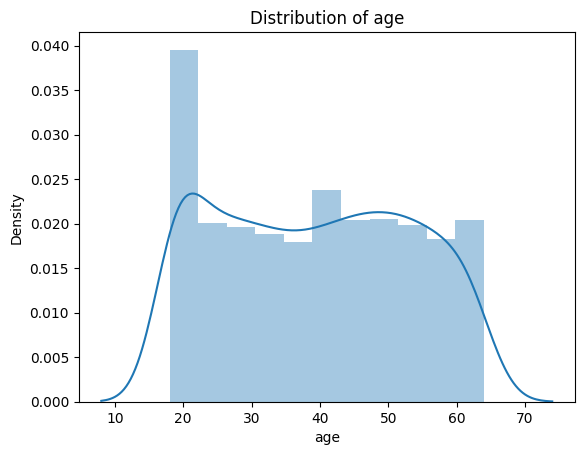

In [102]:
sns.distplot(df['age'])
plt.title('Distribution of age')

In [103]:
print("Median of age of passenger(age)- ",df['age'].median())
df['age'].skew()

Median of age of passenger(age)-  39.0


0.054780773126998195

Text(0.5, 1.0, 'Box Plot of age')

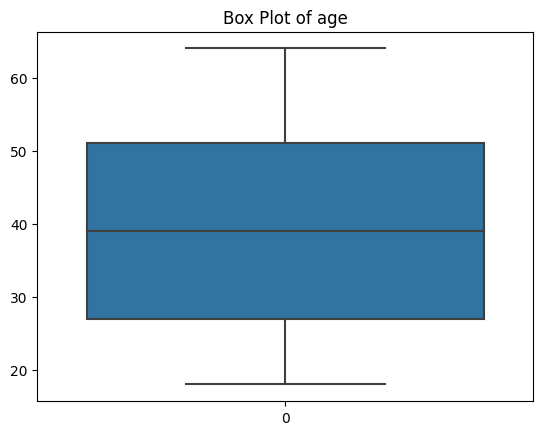

In [104]:
sns.boxplot(df['age'])
plt.title('Box Plot of age')

/tmp/ipykernel_30/1699925903.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of BMI')

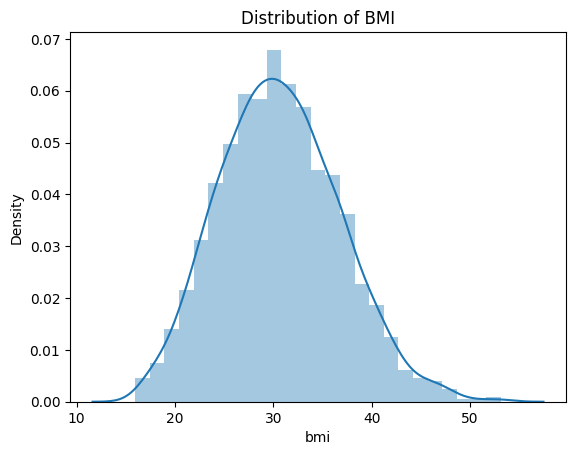

In [105]:
sns.distplot(df['bmi'])
plt.title('Distribution of BMI')

In [106]:
print("Median of BMI of Customer ",df['bmi'].median())
df['bmi'].skew()

Median of BMI of Customer  30.4


0.28391419385321137

Text(0.5, 1.0, 'Box Plot of BMI')

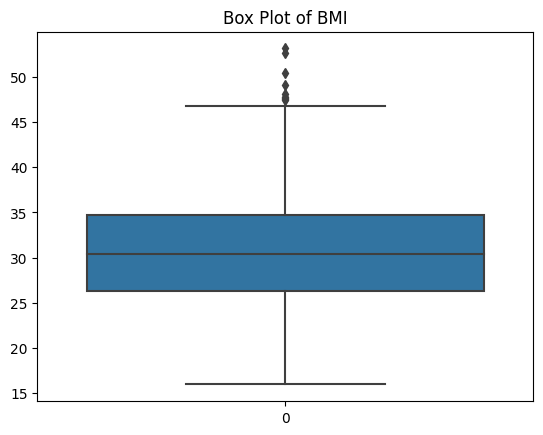

In [107]:
sns.boxplot(df['bmi'])
plt.title('Box Plot of BMI')

/tmp/ipykernel_30/2953846391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Charges')

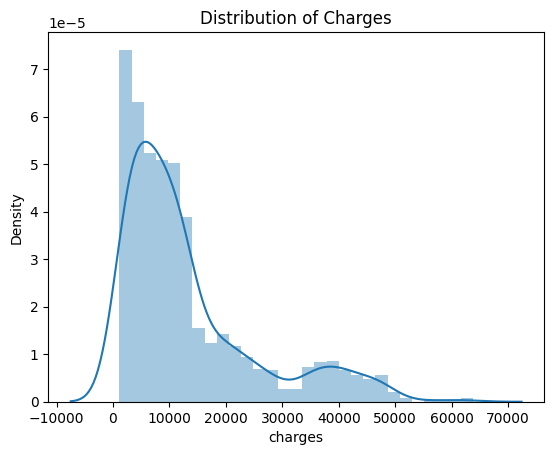

In [108]:
sns.distplot(df['charges'])
plt.title('Distribution of Charges')

In [109]:
print("Median of Charges of Customer ",df['charges'].median())
df['charges'].skew()

Median of Charges of Customer  9386.1613


1.5153909108403483

Text(0.5, 1.0, 'Box Plot of Charges')

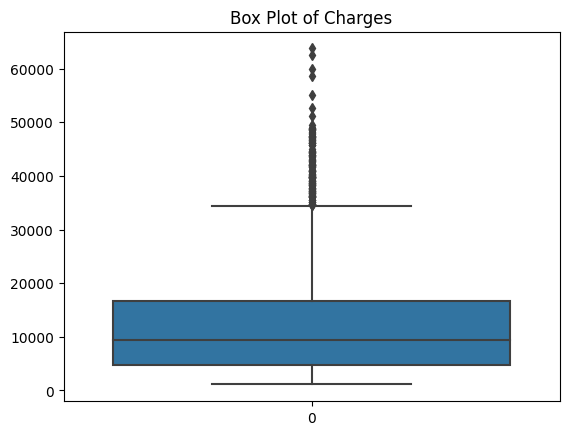

In [110]:
sns.boxplot(df['charges'])
plt.title('Box Plot of Charges')

# Multivariate Analysis

In [111]:
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
%matplotlib inline
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)
import os
print(os.listdir("../input"))

['insurance-claim']


In [112]:
X = df.loc[:, "age":"charges"]  
y = df["insuranceclaim"]  # The target variable is 'insuranceclaim'

print(X.head())  
print(y.head())  

   age     sex     bmi  children smoker     region      charges
0   19  Female  27.900         0    Yes  Southwest  16884.92400
1   18    Male  33.770         1     No  Southeast   1725.55230
2   28    Male  33.000         3     No  Southeast   4449.46200
3   33    Male  22.705         0     No  Northwest  21984.47061
4   32    Male  28.880         0     No  Northwest   3866.85520
0        claimed
1        claimed
2    not claimed
3    not claimed
4        claimed
Name: insuranceclaim, dtype: object


**PairPlot**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

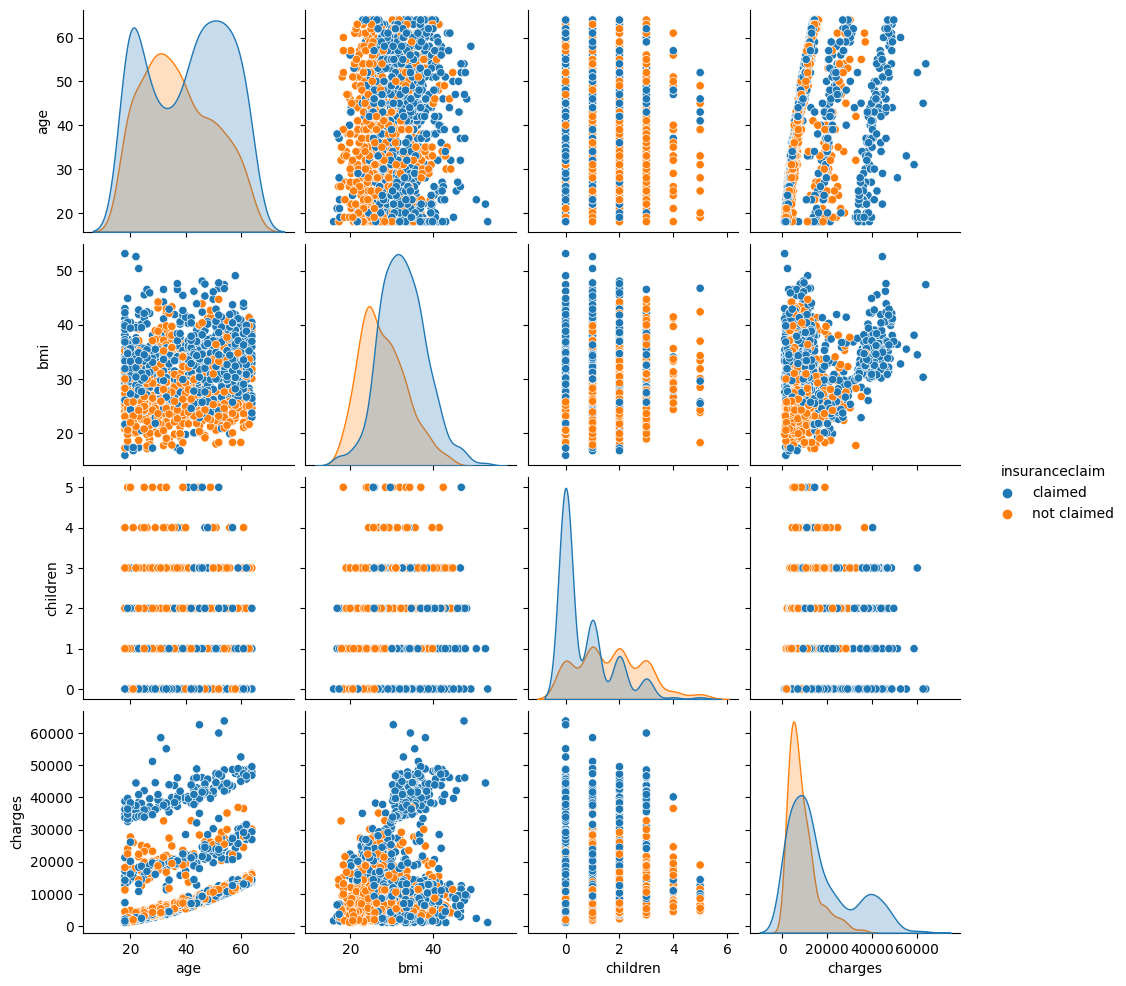

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create pairplot, with 'insuranceclaim' as the hue to distinguish numerical categories
sns.pairplot(df, hue='insuranceclaim', diag_kind='kde')
plt.show()


In [37]:
data = pd.read_csv("/kaggle/input/insurance-claim/Insurance.csv")
print(data)

      age  sex     bmi  children  smoker  region      charges  insuranceclaim
0      19    0  27.900         0       1       3  16884.92400               1
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               0
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               0
1337   61    0  29.070         0       1       1  29141.36030               1

[1338 rows x 8 columns]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

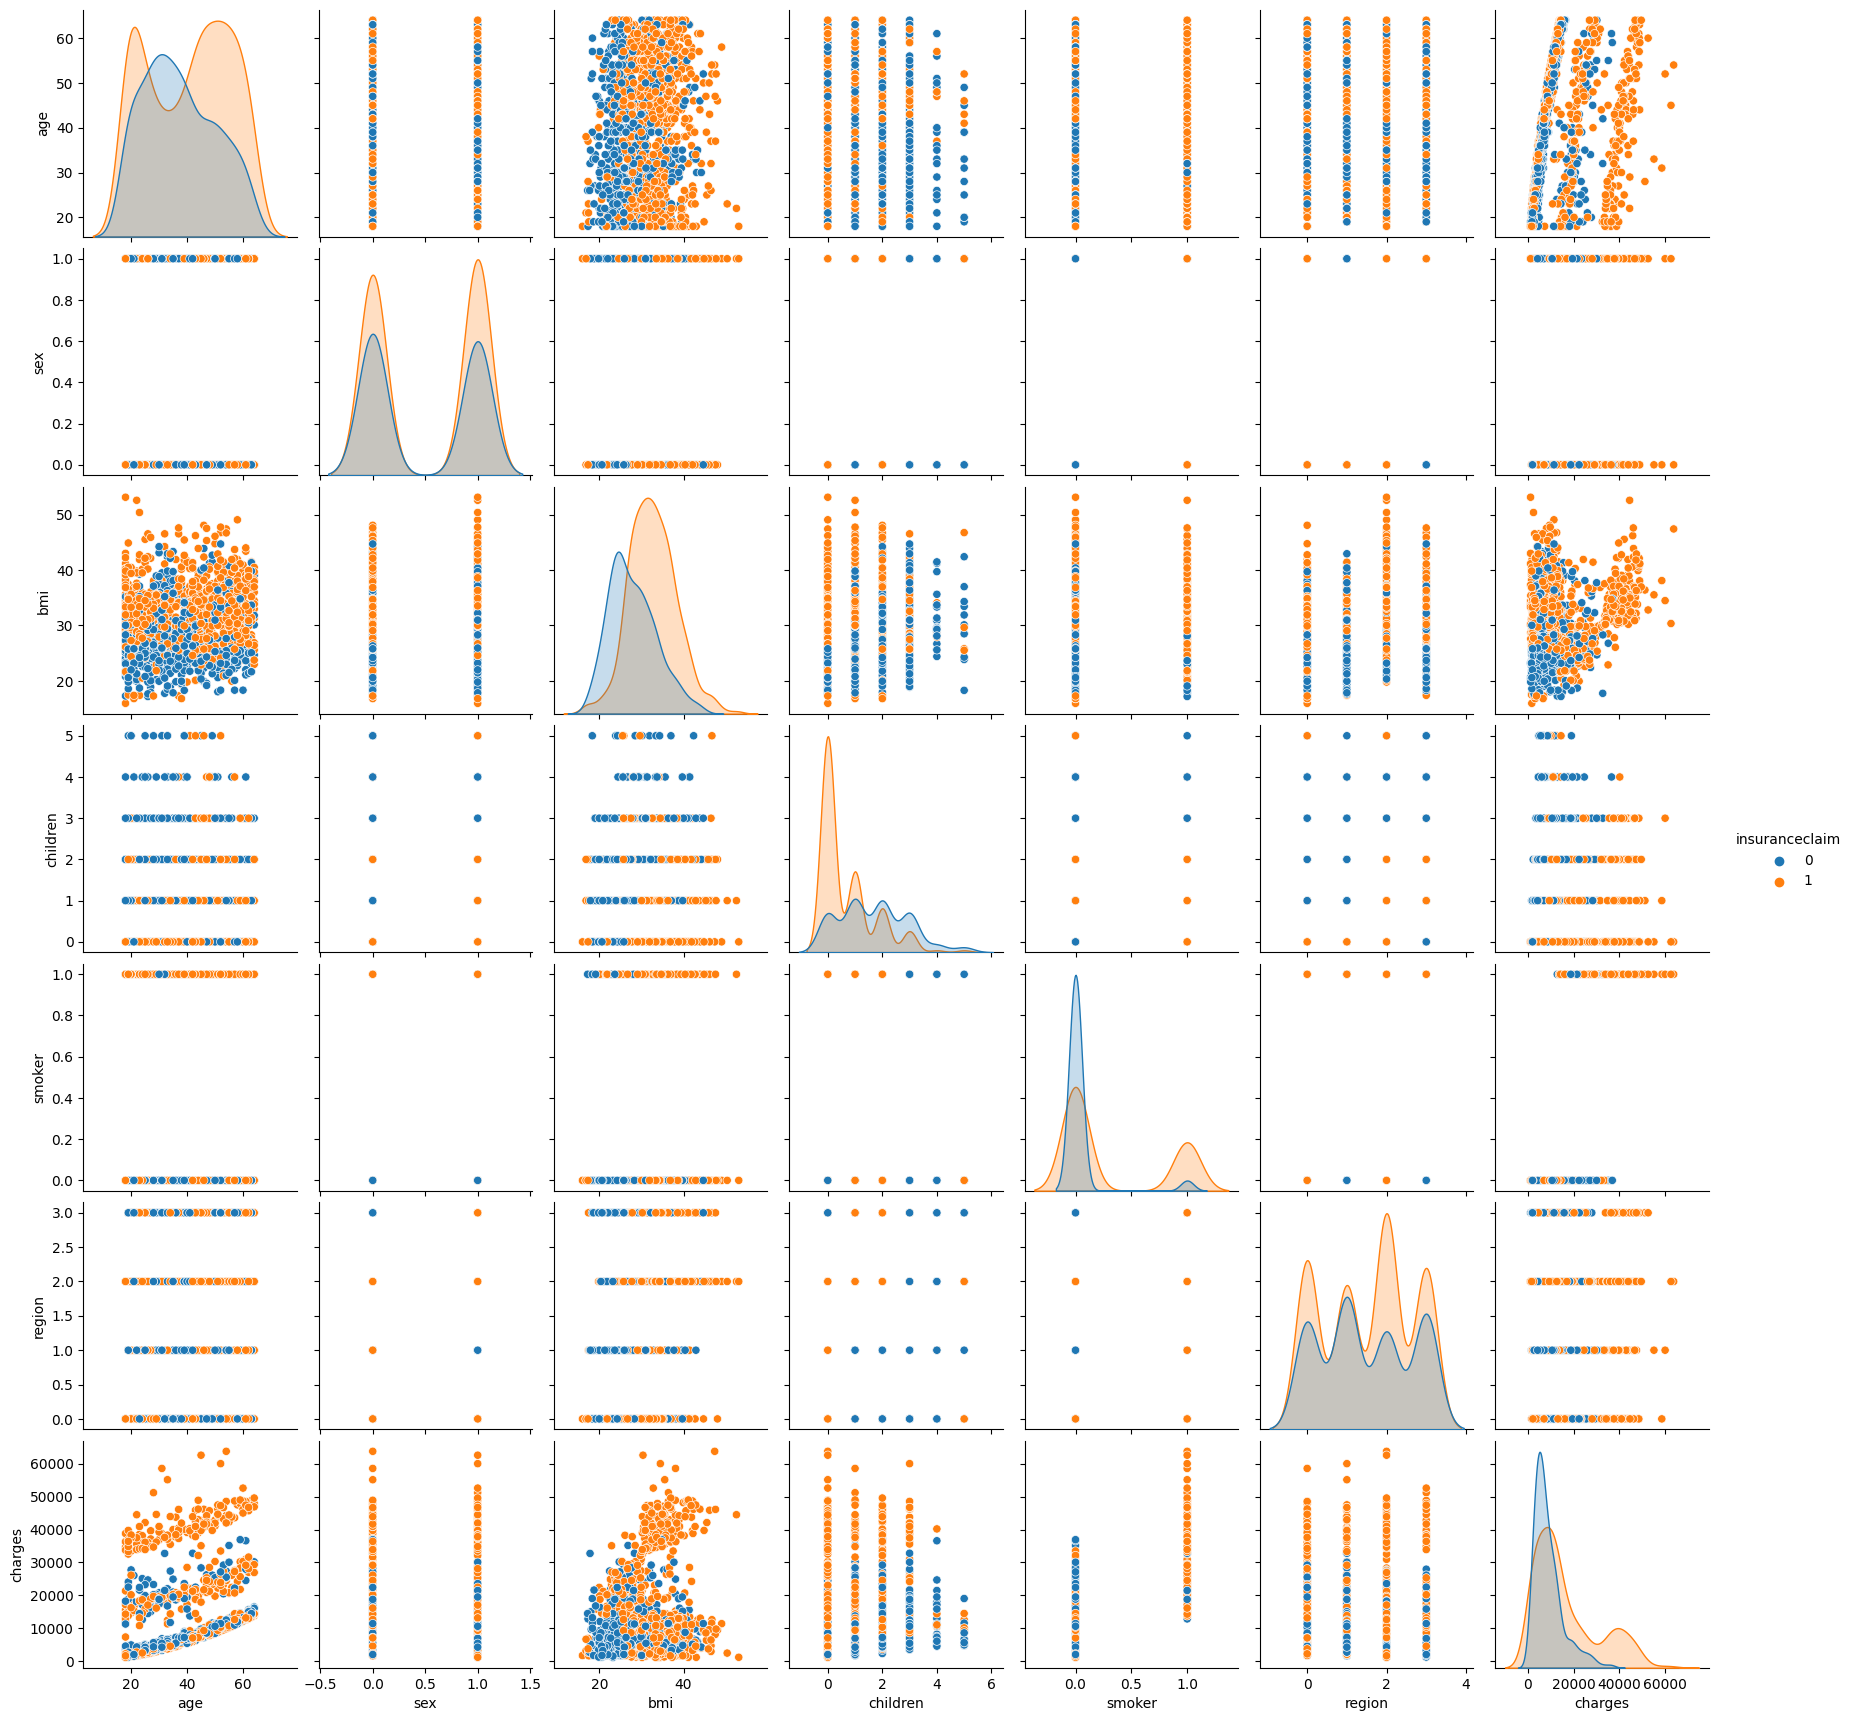

In [38]:
# Create pairplot, with 'insuranceclaim' as the hue to all categories
sns.pairplot(data, hue='insuranceclaim', diag_kind='kde')
plt.show()

In [61]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # List of numerical columns to plot
# numerical_columns = ["age","sex","bmi","children","smoker","region","charges"]

# # Loop to create pairwise scatter plots
# for i in range(len(numerical_columns) - 1):
#     # Create scatter plot for each pair of numerical columns
#     sns.lmplot(x=numerical_columns[i], y=numerical_columns[i + 1], data=data, hue="insuranceclaim", fit_reg=False)
    
# # Show all plots
# plt.show()


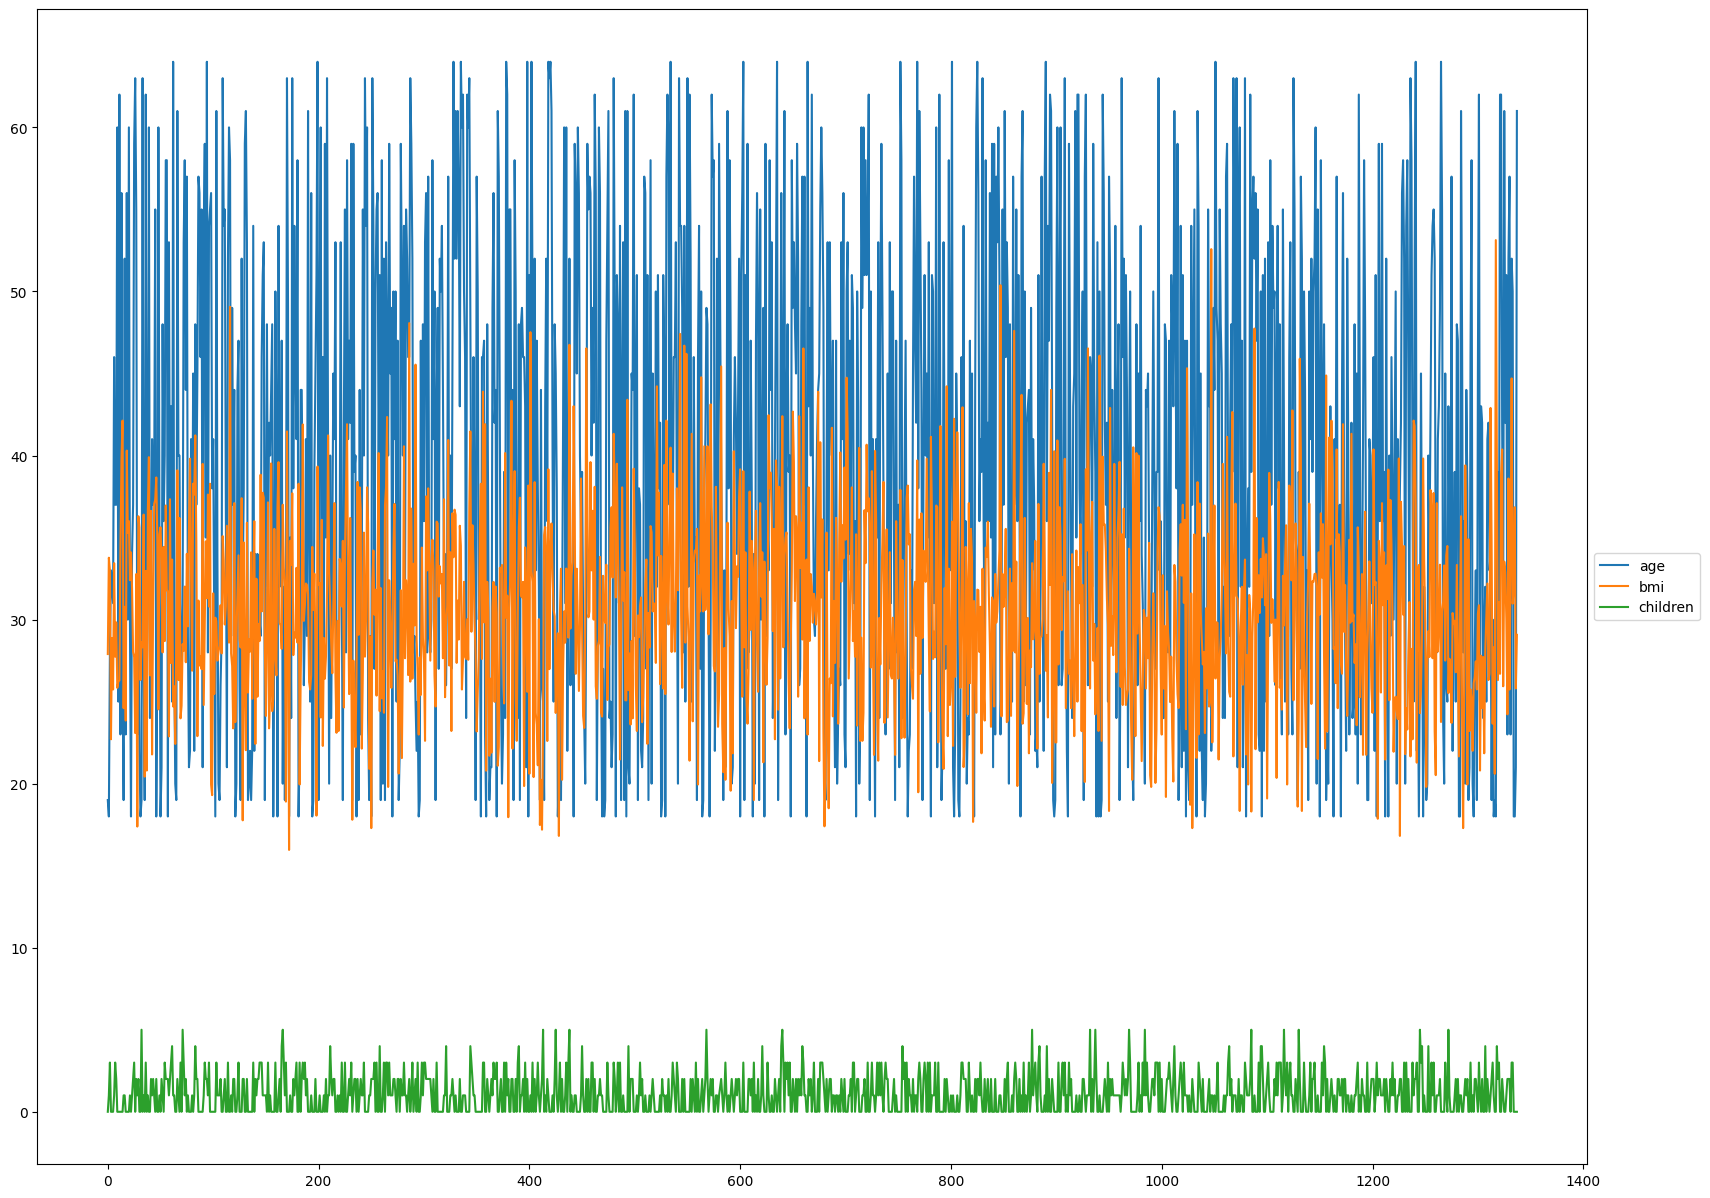

In [62]:
#PROFILE PLOT/////////////////////////////////////////////////////

numerical_columns = ["age", "bmi", "children"]
# Create the profile plot for the numerical variables
ax = df[numerical_columns].plot(figsize=(20, 15))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


**Grouping**

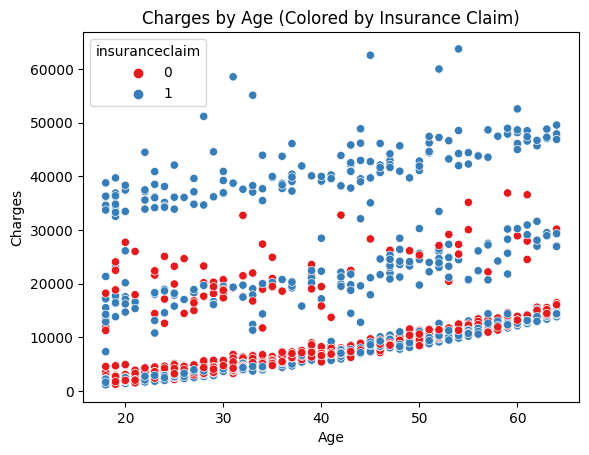

In [64]:
# Scatter plot of age vs. charges, colored by insurance claim
sns.scatterplot(data=data, x="age", y="charges", hue="insuranceclaim", palette="Set1")

plt.title("Charges by Age (Colored by Insurance Claim)")
plt.xlabel("Age")
plt.ylabel("Charges")

# Show the plot
plt.show()


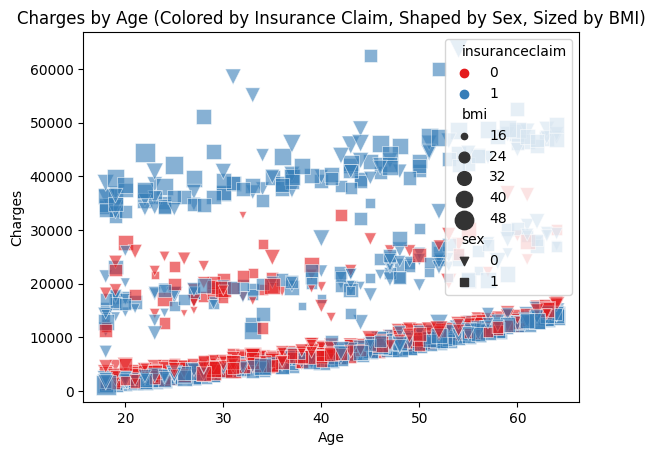

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom markers for sex
markers = {0: 'v',  # Triangle for female
           1: 's'}  # Square for male

# Scatter plot of age vs. charges, colored by insuranceclaim, shaped by sex, and sized by bmi
sns.scatterplot(data=data, x="age", y="charges", hue="insuranceclaim", 
                style="sex", markers=markers, size="bmi", sizes=(20, 200), 
                alpha=0.6, palette="Set1")


plt.title("Charges by Age (Colored by Insurance Claim, Shaped by Sex, Sized by BMI)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


# Means and Variances Per Group

In [43]:
# Define the function to calculate and print mean, std dev, and sample sizes by group
def printMeanAndSdByGroup(variables, groupvariable):
    # Group the data by the specified categorical group variable
    data_groupby = variables.groupby(groupvariable)

    # Select only numerical columns for calculations
    numerical_cols = variables.select_dtypes(include=[np.number]).columns

    means = data_groupby[numerical_cols].mean()
    std_devs = data_groupby[numerical_cols].std()
    sample_sizes = data_groupby.size()

    
    print("## Means:")
    display(means)

    print("\n## Standard deviations:")
    display(std_devs)

    print("\n## Sample sizes:")
    display(sample_sizes)

printMeanAndSdByGroup(data, 'insuranceclaim')


## Means:


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
insuranceclaim,,,,,,,,
0,37.309910,0.486486,27.881586,1.681081,0.045045,1.488288,8821.421892,0.0
1,40.551724,0.518519,32.635179,0.679438,0.318008,1.535121,16423.928277,1.0



## Standard deviations:


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
insuranceclaim,,,,,,,,
0,12.773414,0.500268,5.590745,1.246331,0.20759,1.113321,6446.510127,0.0
1,14.749470,0.499976,5.661491,0.983586,0.46600,1.099165,14045.928419,0.0



## Sample sizes:


insuranceclaim
0    555
1    783
dtype: int64

> ******Between-groups Variance and Within-groups Variance for a Variable****

In [46]:
def calcWithinGroupsVariance(variable, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable == leveli]
        levelilength = len(levelidata)
        sdi = np.std(levelidata)
        numi = (levelilength) * sdi ** 2
        denomi = levelilength
        numtotal += numi
        denomtotal += denomi
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

def calcBetweenGroupsVariance(variable, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    grandmean = np.mean(variable)
    numtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable == leveli]
        levelilength = len(levelidata)
        meani = np.mean(levelidata)
        numi = levelilength * ((meani - grandmean) ** 2)
        numtotal += numi
    Vb = numtotal / (numlevels - 1)
    return Vb

def calcSeparations(variables, groupvariable):
    # Calculate the separation for each variable
    for variablename in variables.columns:
        variablei = variables[variablename]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = Vb / Vw if Vw != 0 else np.nan  # Prevent division by zero
        print("Variable:", variablename, "Vw =", Vw, "Vb =", Vb, "Separation =", sep)

calcSeparations(data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']], data['insuranceclaim'])


Variable: age Vw = 194.9942744520279 Vb = 3413.3032932267256 Separation = 17.504633419718484
Variable: sex Vw = 0.25009740279201353 Vb = 0.3332480462525294 Separation = 1.3324730386331352
Variable: bmi Vw = 31.722382357524513 Vb = 7339.097556614075 Separation = 231.35392146464213
Variable: children Vw = 1.2103969342044911 Vb = 325.855136859451 Separation = 269.2134519273322
Variable: smoker Vw = 0.14497751933225814 Vb = 24.199421317095663 Separation = 166.91843969019536
Variable: region Vw = 1.2211512255596504 Vb = 0.712366239751427 Separation = 0.5833562828591942
Variable: charges Vw = 132711189.55375633 Vb = 18772072324.548637 Separation = 141.45056183785297


In [47]:

def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    
    # get the covariance of variable1 and variable2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable == leveli]
        levelidata2 = variable2[groupvariable == leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1) * (levelidata2j - mean2)
        
        Cov_groupi = term1  
        Covw += Cov_groupi
    
    totallength = len(variable1)
    Covw /= (totallength - numlevels)
    return Covw


covariance_age_bmi = calcWithinGroupsCovariance(data['age'], data['bmi'], data['insuranceclaim'])
print("Within-Groups Covariance between age and bmi:", covariance_age_bmi)


Within-Groups Covariance between age and bmi: 5.623046435553866


In [48]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable == leveli]
        levelidata2 = variable2[groupvariable == leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    
    Covb /= (numlevels - 1)
    return Covb

covariance_age_bmi_between_groups = calcBetweenGroupsCovariance(data['age'], data['bmi'], data['insuranceclaim'])
print("Between-Groups Covariance between age and bmi:", covariance_age_bmi_between_groups)


Between-Groups Covariance between age and bmi: 5005.054031606755


In [49]:
# Calculate the Pearson correlation between 'age' and 'bmi'
corr = stats.pearsonr(data['age'], data['bmi'])
print("p-value:\t", corr[1])
print("correlation coefficient:\t", corr[0])

p-value:	 6.194289065049117e-05
correlation coefficient:	 0.10927188154853515


In [50]:
# Selecting numerical columns to calculate the correlation matrix
X = data[["age", "sex", "bmi", "children", "smoker", "region", "charges"]]

# Calculate the correlation matrix
corrmat = X.corr()
print("Correlation Matrix:")
print(corrmat)


Correlation Matrix:
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


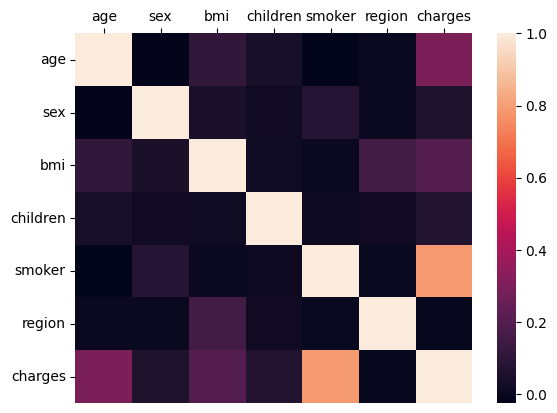

In [51]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [52]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # Find the correlations
    cormatrix = mydataframe.corr()
    
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    
    # Find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    
    return cormatrix.head(numtoreport)

# Get the most highly correlated pairs
num_to_report = 5  
top_correlations = mosthighlycorrelated(data, num_to_report)

print(top_correlations)


  FirstVariable  SecondVariable  Correlation
0        smoker         charges     0.787251
1      children  insuranceclaim    -0.409526
2           bmi  insuranceclaim     0.384198
3        smoker  insuranceclaim     0.333261
4       charges  insuranceclaim     0.309418


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardisedX = scaler.fit_transform(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

display(standardisedX.describe())


,age,sex,bmi,children,smoker,region,charges
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-1.234687e-16,-2.124194e-16,-5.576008e-17,1.062097e-17,9.027823e-17,-8.098488e-17
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-1.010519e+00,-2.412011e+00,-9.086137e-01,-5.074631e-01,-1.372326e+00,-1.003557e+00
25%,-8.691547e-01,-1.010519e+00,-7.164063e-01,-9.086137e-01,-5.074631e-01,-4.669155e-01,-7.046504e-01
50%,-1.474046e-02,9.895908e-01,-4.320880e-02,-7.876719e-02,-5.074631e-01,4.384945e-01,-3.212089e-01
75%,8.396738e-01,9.895908e-01,6.611572e-01,7.510793e-01,-5.074631e-01,4.384945e-01,2.783441e-01
max,1.765289e+00,9.895908e-01,3.685522e+00,3.240619e+00,1.970587e+00,1.343905e+00,4.171663e+00


In [54]:
pca = PCA().fit(standardisedX)

In [55]:
from sklearn.decomposition import PCA
def pca_summary(pca, standardised_data, out=True):
    # Generate names for principal components
    names = ["PC" + str(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    
    # Calculate standard deviation of the principal components
    a = list(np.std(pca.transform(standardised_data), axis=0))
    
    # Proportion of variance explained by each component
    b = list(pca.explained_variance_ratio_)
    
    # Cumulative proportion of variance
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    
    # Create a MultiIndex for the summary DataFrame
    columns = pd.MultiIndex.from_tuples([
        ("sdev", "Standard deviation"),
        ("varprop", "Proportion of Variance"),
        ("cumprop", "Cumulative Proportion")
    ])
    
   
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    
    if out:
        print("Importance of components:")
        display(summary)
    
    return summary


pca = PCA()
pca.fit(standardisedX)

pca_summary(pca, standardisedX)


Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.372437,0.269083,0.269083
PC2,1.087653,0.168998,0.438082
PC3,1.023357,0.149609,0.587690
PC4,0.999995,0.142856,0.730546
PC5,0.976356,0.136182,0.866727
PC6,0.894127,0.114209,0.980936
PC7,0.365301,0.019064,1.000000


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.372437,0.269083,0.269083
PC2,1.087653,0.168998,0.438082
PC3,1.023357,0.149609,0.587690
PC4,0.999995,0.142856,0.730546
PC5,0.976356,0.136182,0.866727
PC6,0.894127,0.114209,0.980936
PC7,0.365301,0.019064,1.000000


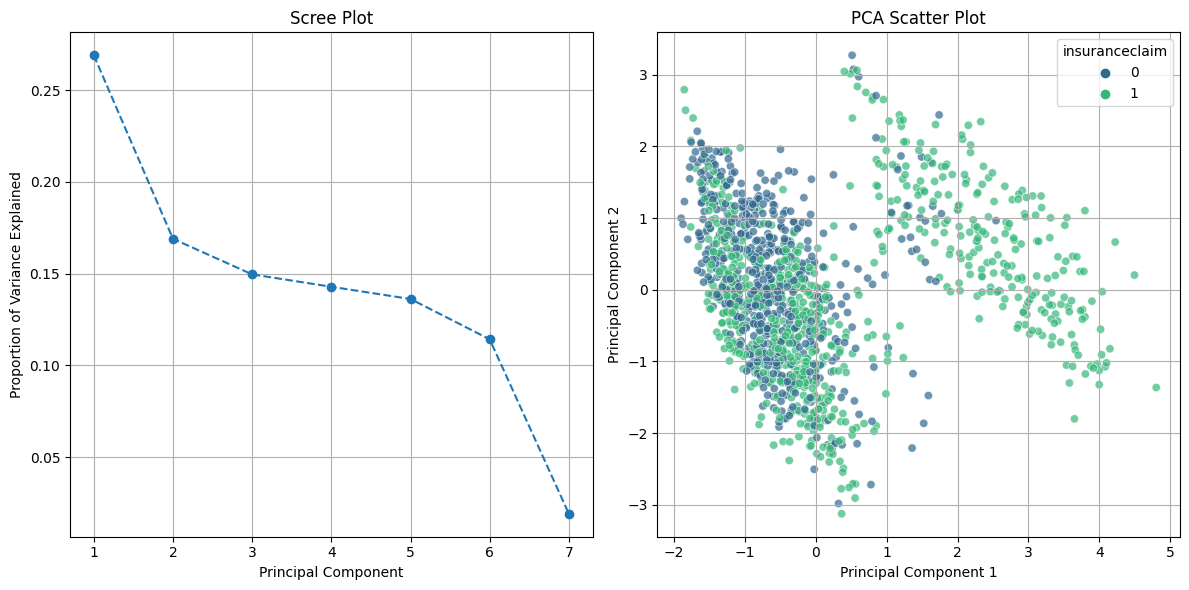

In [56]:
# Scree Plot
pca = PCA()
pca.fit(standardisedX)

explained_variance = pca.explained_variance_ratio_
components = pca.transform(standardisedX)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()

# Scatter Plot of the first two principal components
plt.subplot(1, 2, 2)
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=data['insuranceclaim'], palette='viridis', alpha=0.7)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()

plt.tight_layout()
plt.show()


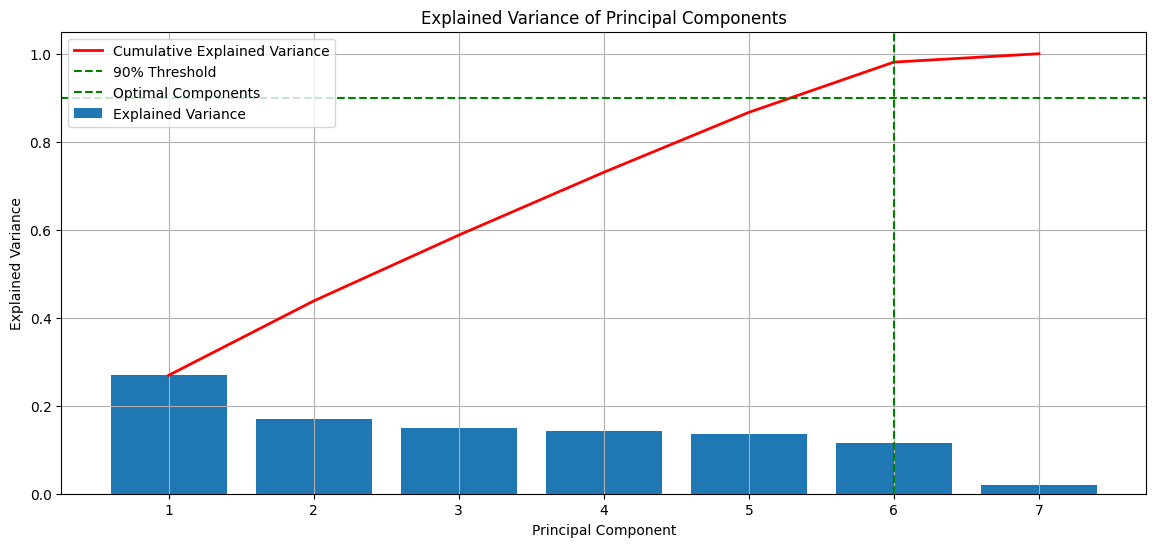

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)  # Assuming X is your feature DataFrame

pca = PCA()
pca.fit(data_scaled)

# Create a DataFrame for explained variance ratios
explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, pca.n_components_ + 1),
    'Explained Variance': pca.explained_variance_ratio_,
    'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)
})

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))

# Bar plot for explained variance
ax.bar(explained_variance_df['Principal Component'], explained_variance_df['Explained Variance'], lw=2, label='Explained Variance')

# Line plot for cumulative explained variance
ax.plot(explained_variance_df['Principal Component'], explained_variance_df['Cumulative Explained Variance'], lw=2, label='Cumulative Explained Variance', color='red')

# Add threshold lines
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Threshold')
plt.axvline(x=6, color='g', linestyle='--', label='Optimal Components')

ax.set_title('Explained Variance of Principal Components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.xticks(range(1, pca.n_components_ + 1))  
plt.show()


**Direct Correkation Formula**

In [58]:
std = StandardScaler()

print('Standardization on Data'.center(100))

data_numerical = data  
data_scaled = std.fit_transform(data_numerical)

data_scaled_df = pd.DataFrame(data_scaled, columns=data_numerical.columns)
display(data_scaled_df.describe())

                                      Standardization on Data                                       


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-1.234687e-16,-2.124194e-16,-5.576008e-17,1.062097e-17,9.027823e-17,-8.098488e-17,-8.496774e-17
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-1.010519e+00,-2.412011e+00,-9.086137e-01,-5.074631e-01,-1.372326e+00,-1.003557e+00,-1.187776e+00
25%,-8.691547e-01,-1.010519e+00,-7.164063e-01,-9.086137e-01,-5.074631e-01,-4.669155e-01,-7.046504e-01,-1.187776e+00
50%,-1.474046e-02,9.895908e-01,-4.320880e-02,-7.876719e-02,-5.074631e-01,4.384945e-01,-3.212089e-01,8.419099e-01
75%,8.396738e-01,9.895908e-01,6.611572e-01,7.510793e-01,-5.074631e-01,4.384945e-01,2.783441e-01,8.419099e-01
max,1.765289e+00,9.895908e-01,3.685522e+00,3.240619e+00,1.970587e+00,1.343905e+00,4.171663e+00,8.419099e-01


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1



Inference: The Datset consists of 8 features & 1338 samples.


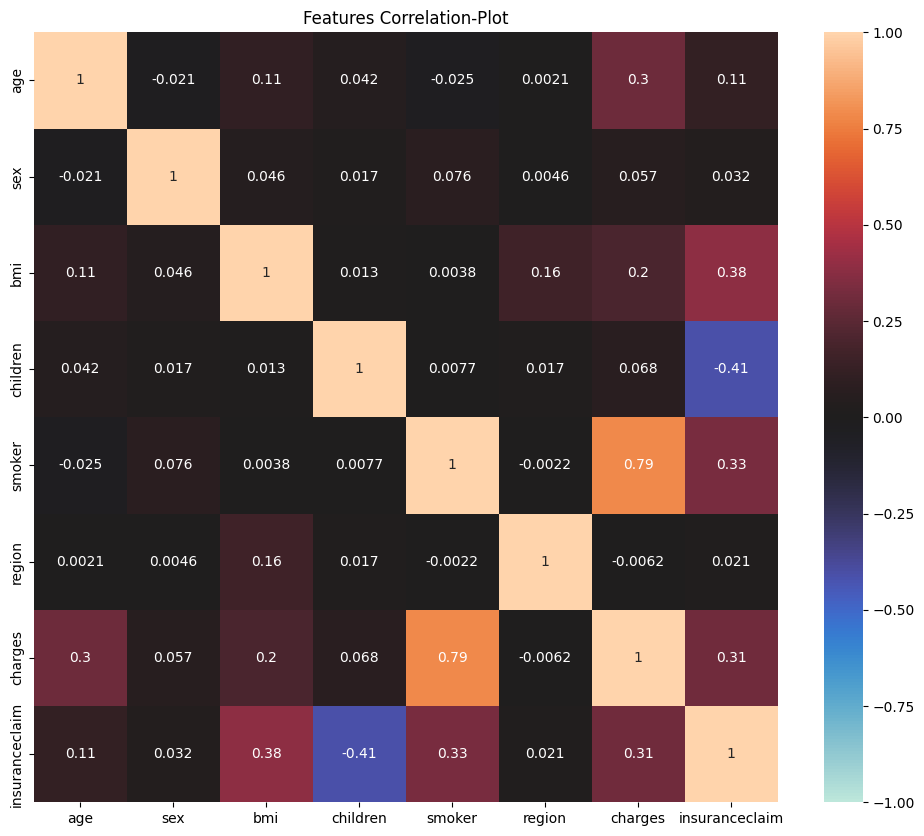

In [59]:
#Checking the correlation
target = 'insuranceclaim'
labels = ['Claimed','Not Claimed']
features = [i for i in data.columns.values if i not in [target]]
original_df = df.copy(deep=True)
display(data.head())
print('The Datset consists of {} features & {} samples.'.format(data.shape[1], data.shape[0]))

features = data.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(data[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

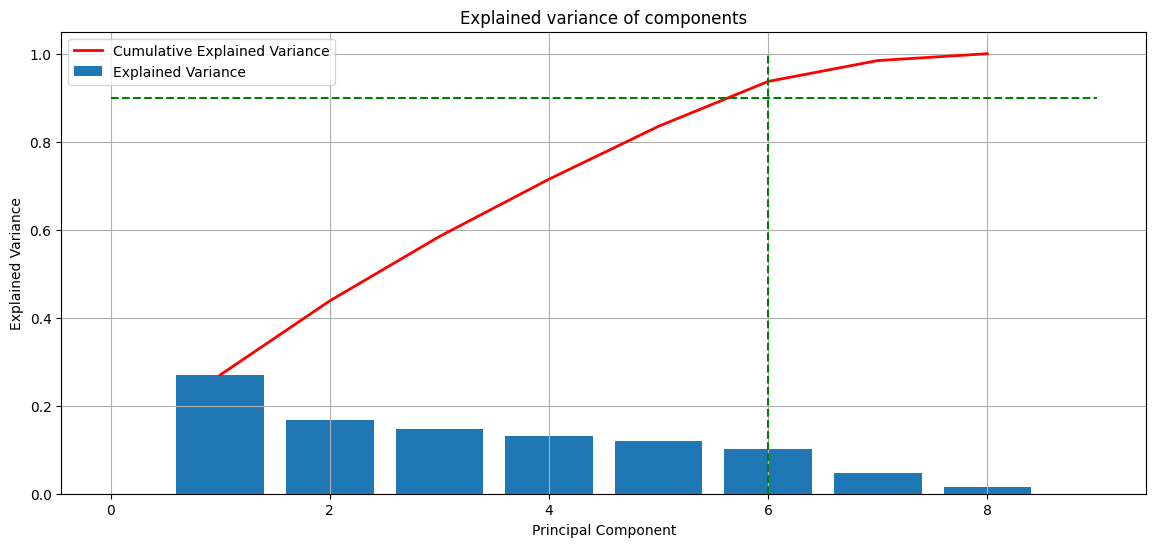

In [60]:
from sklearn.decomposition import PCA

pca = PCA().fit(data_scaled_df)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([6,6],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()